# Preprocessing of the *Lysekil* data

To summarize the notebook, the initial cleaning of the *Lysekil* data was performed. The notebook contains several cells that perform various tasks such as loading the data, basic preprocessing, removal of highly correlated data, renaming columns, and reordering the columns.

In [1]:
import sys
sys.path.append("../scripts")

import os
import pandas as pd
import preprocessing, visualize, utils
import plotly.figure_factory as ff
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

pd.set_option('display.max_columns', None)

OVERWRITE = False
DIR = '/Users/junxingli/Desktop/master_thesis/'
PLOTS_PATH = os.path.join(DIR, 'figs/preprocessing/')
DATA_PATH = os.path.join(DIR, 'data/processed/')
DATA_PATH_RAW = os.path.join(DIR, 'data/raw/')

## Initial cleaning (loading, redundancy, renaming)


Note that this notebook assumes the data is scatterd across two separate files and is during the preprocessing merged together. This notebooks requires
a special naming of the files or one can edit the `preprocessing.py`-file.

**Naming requirements**
* Main *Lysekil* data: `Lysekil_MEA_data_unprotected.xlsx`
* Extended *Lysekil* data: `Extended_Lysekil_MEA_data_fixed.xlsx`

In [2]:
df1 = preprocessing.lysekil(DATA_PATH_RAW)
df2 = preprocessing.extended_lysekil(DATA_PATH_RAW)

raw_df = preprocessing.initial_clean(df1.join(df2.drop('Time', axis=1), how='outer'))
visualize.print_df_info(raw_df)

Size of the DataFrame: 21618
Number of rows without NaN values: 21618
Number of rows without negative values: 21618


From a domain knowledge perspective, there are a couple of reduntant features present. Looking at the heatmap above, we can determine some correlations:
* Desorber-Sump-UX1029 and Desorber-Sump-Corrected are highly correlated, we
  will therefore remove Desorber-Sump-UX1029 due to domain knowledge
* Desorber-Overhead-FT1067 and Desorber-Overhead-Corrected are highly 
  correlated, we will therefore remove Desorber-Overhead-FT1067 due to domain 
  knowledge
* Desorber-Sump-TIC1029 and Desorber-Sump-Corrected are highly correlated, we 
  will therefore remove Desorber-Sump-TIC1029 due to domain knowledge

In [19]:
corr_cols = []

# Print correlations
visualize.print_corr(raw_df, "Desorber-Sump-UX1029", "Desorber-Sump-Corrected")
corr_cols.append("Desorber-Sump-UX1029")

visualize.print_corr(raw_df, "Desorber-Overhead-FT1067", "Desorber-Overhead-Corrected")
corr_cols.append("Desorber-Overhead-FT1067")

visualize.print_corr(raw_df, "Desorber-Sump-TIC1029", "Desorber-Sump-Corrected")
corr_cols.append("Desorber-Sump-TIC1029")

# Remove highly correlated columns
drop_df = raw_df.drop(corr_cols, axis=1)


The correlation between the following columns
---------------------------------------------
Desorber-Sump-UX1029
Desorber-Sump-Corrected
ρ = 0.98
---------------------------------------------

The correlation between the following columns
---------------------------------------------
Desorber-Overhead-FT1067
Desorber-Overhead-Corrected
ρ = 0.93
---------------------------------------------

The correlation between the following columns
---------------------------------------------
Desorber-Sump-TIC1029
Desorber-Sump-Corrected
ρ = 0.99
---------------------------------------------



We will now reorder the columns so that they are sorted according to the PFD of the process.

In [20]:
# Rename columns
new_cols = ["F1", "D1", "T1",
            "T2", "P2",
            "P10", "T10", "F10",
            "P3", "T3",
            "P4", "T4",
            "T5", 
            "P6",
            "T7", "U7",
            "T8", "F8", "D8",
            "T9",
            "L7", 
            "A11", "B11",
            "A12", "B12",
            "Cap"]

old_cols = drop_df.columns.values[1:]
column_mapping = {old_col: new_col for old_col, new_col in zip(old_cols, new_cols)}
drop_df.rename(columns=column_mapping, inplace=True)

# Reordering of columns
order_cols = ["Time",
              "F1", "D1", "T1",
              "P2", "T2",
              "P3", "T3",
              "P4", "T4",
              "T5", 
              "P6",
              "T7", "U7", "L7",
              "F8", "D8", "T8", 
              "T9",
              "F10", "P10", "T10",
              "A11", "B11",
              "A12", "B12",
              "Cap"]

initial_clean_df = drop_df[order_cols]
visualize.generate_overview(initial_clean_df)

,Time,F1,D1,T1,P2,T2,P3,T3,P4,T4,T5,P6,T7,U7,L7,F8,D8,T8,T9,F10,P10,T10,A11,B11,A12,B12,Cap
NaN count,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Valid count,NaN,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00,21618.00
mean,NaN,1.83,1095.51,46.96,1.44,106.84,0.88,93.58,0.88,101.93,104.20,0.89,119.24,125.11,500.06,2.13,1027.76,117.42,71.41,117.74,0.89,25.70,5.33,18.50,5.93,2.79,86.93
std,NaN,0.31,6.06,3.06,0.10,1.87,0.08,3.20,0.08,1.81,3.50,0.08,1.67,9.44,4.65,0.27,7.17,1.52,5.19,9.33,0.08,6.30,1.68,1.87,2.34,1.43,8.78
min,NaN,0.07,1041.67,26.32,0.84,80.65,0.29,19.40,0.29,67.00,77.26,0.29,89.18,2.27,440.25,0.36,1009.22,98.32,30.53,11.29,0.29,11.35,1.38,0.05,1.34,0.03,0.01
25%,NaN,1.64,1090.61,44.95,1.43,105.99,0.90,92.30,0.90,101.34,102.66,0.90,118.96,120.26,499.35,1.98,1023.02,117.29,69.02,114.14,0.90,18.89,4.17,18.22,4.43,2.13,86.85
50%,NaN,1.81,1095.36,46.50,1.45,106.55,0.90,93.73,0.90,101.92,103.72,0.90,119.86,124.97,500.02,2.07,1027.13,117.75,72.43,118.17,0.90,29.50,4.38,18.47,4.68,2.47,89.08
75%,NaN,2.07,1099.65,48.35,1.49,108.12,0.90,95.11,0.90,102.79,105.80,0.90,120.01,131.77,500.68,2.31,1033.11,118.06,75.25,123.31,0.90,30.17,7.03,19.24,7.79,2.99,90.29
max,NaN,2.56,1114.45,57.19,2.24,112.40,1.50,113.58,1.50,116.80,118.53,1.50,127.56,140.55,649.52,2.93,1090.98,125.38,100.08,146.72,1.50,46.28,13.46,21.61,19.74,19.93,99.83


## Correction of F10

Due to the nature of the condensation process, the $F10$ stream will contain small amounts of water. It is therefore crucial to identify how much this influences the stream and then adjust the value such that it is mostly $CO_2$.

File CO2-Correction-Overview.pdf already exists at /Users/junxingli/Desktop/master_thesis/figs/preprocessing/CO2-Correction-Overview.pdf. Set 'overwrite=True' to overwrite the file.


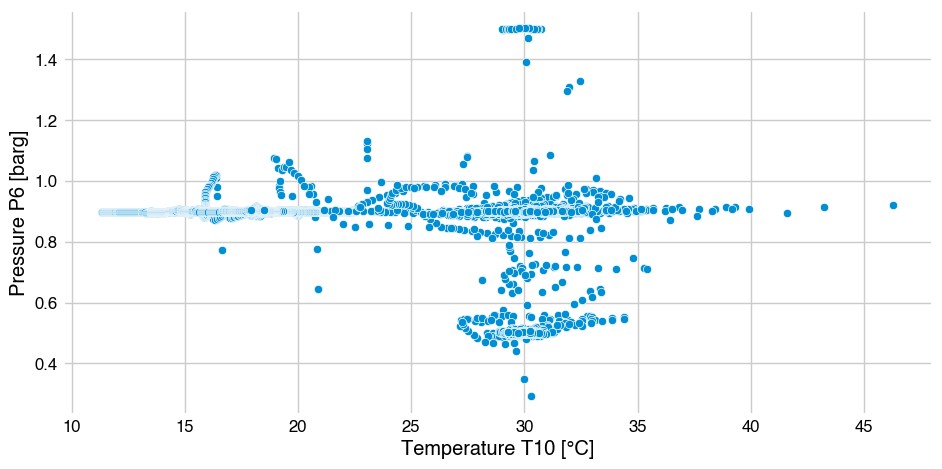

In [21]:
x = initial_clean_df["T10"]  # Temperature data from column T10
y = initial_clean_df["P6"]   # Pressure data from column P6

plt.figure(figsize=(10, 5)) 
sns.scatterplot(x=x, y=y)  
plt.xlabel("Temperature T10 [°C]")
plt.ylabel("Pressure P6 [barg]")
plt.grid(True) 
utils.save_file(plt.gcf(), PLOTS_PATH, 'CO2-Correction-Overview.pdf', 'matplotlib', overwrite=OVERWRITE)
plt.show()

From the above plot, we can observe 3 distinct pressures and a temperature range of the condenser. This can be used to calculate the moisture content in the $F10$ stream. In order to calculate the moisture content of the $CO_2$ outlet stream, we can utilize the vapor pressure of water as the following Equation from Daltons Law:

\begin{equation*}
    P_{tot} = P_{CO_2} + P_{H_2O}
\end{equation*}

where 

\begin{equation*}
    P_{H_2O} = f(T)
\end{equation*}

which can be found in thermodynamical data sheets. In order to calculate the molar composition, we can use Raoults law:

\begin{align*}
    P_{CO_2}  &= x_{CO_2} P_{tot} \\
    \\
    x_{CO_2} &= \frac{P_{CO_2}}{P_{tot}}= 1 - \frac{P_{H_2O}}{P_{tot}}
\end{align*}

Since the measurement of the $CO_2$ stream is given in mass, we transform this into mass fraction.

\begin{align*}
    w_{CO_2} &= \frac{m_{CO_2}}{m_{CO_2} + m_{H_2O}} \\
             &= \frac{x_{CO_2}n_{tot}Mm_{CO_2}}{x_{CO_2}n_{tot}Mm_{CO_2} + x_{H_2O}n_{tot}Mm_{H_2O}} \\
             &= \frac{x_{CO_2}Mm_{CO_2}}{x_{CO_2}Mm_{CO_2} + (1 - x_{CO_2})Mm_{H_2O}}
\end{align*}

In [22]:
# Picking some intervals by looking at the dropdown plot
P_tot = np.linspace(0.5, 2, 11) # barg
T = np.array([10, 15, 20, 25, 30, 35, 40, 45]) # °C

# Partial pressure of water vapor in MPa 
# from Perry's Chemical Engineers' Handbook
P_H2O = np.array([0.0012282, 0.0017058, 0.0023393, 0.0031699, 
                  0.0042470, 0.0056290, 0.0073849, 0.0095950])

CO2_df = visualize.generate_moisture_df(P_tot, T, P_H2O)
CO2_df

,10°C,15°C,20°C,25°C,30°C,35°C,40°C,45°C
0.50,0.997,0.995,0.994,0.991,0.988,0.984,0.979,0.973
0.65,0.997,0.996,0.994,0.992,0.989,0.986,0.981,0.975
0.80,0.997,0.996,0.995,0.993,0.990,0.987,0.983,0.977
0.95,0.997,0.996,0.995,0.993,0.991,0.988,0.984,0.979
1.10,0.998,0.997,0.995,0.994,0.992,0.989,0.985,0.981
1.25,0.998,0.997,0.996,0.994,0.992,0.990,0.986,0.982
1.40,0.998,0.997,0.996,0.995,0.993,0.990,0.987,0.983
1.55,0.998,0.997,0.996,0.995,0.993,0.991,0.988,0.984
1.70,0.998,0.997,0.996,0.995,0.993,0.991,0.989,0.985
1.85,0.998,0.998,0.997,0.995,0.994,0.992,0.989,0.986


/Users/junxingli/Desktop/master_thesis/notebooks/../scripts/preprocessing.py:168: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '124.39902629852295' has dtype incompatible with float32, please explicitly cast to a compatible dtype first.



File F10-Correction.pdf already exists at /Users/junxingli/Desktop/master_thesis/figs/preprocessing/F10-Correction.pdf. Set 'overwrite=True' to overwrite the file.


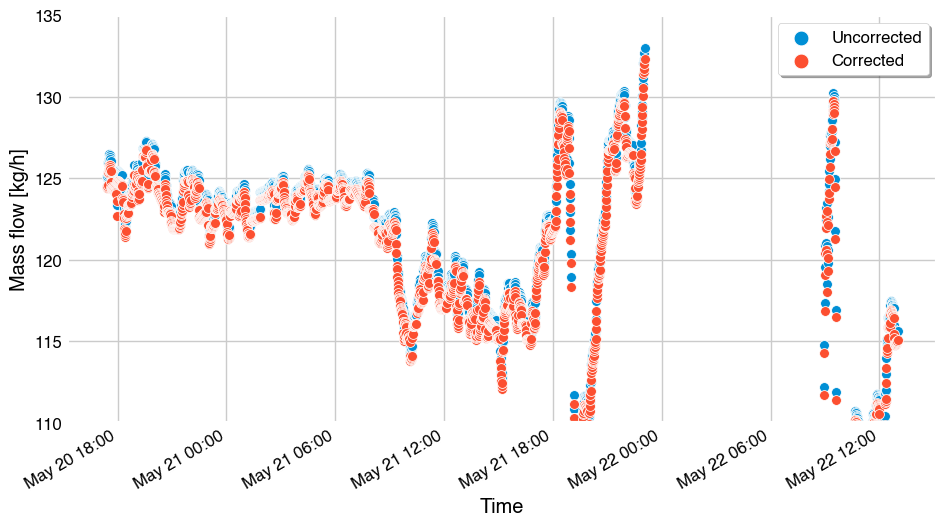

In [23]:
def plot_data(df_uncorrected, df_corrected, cutoff_date, plots_path, overwrite=False, limit=[0, 200]):
    # Filter data based on cutoff date
    df_uncorrected['Time'] = pd.to_datetime(df_uncorrected['Time'])
    df_corrected['Time'] = pd.to_datetime(df_corrected['Time'])
    
    filtered_df = df_uncorrected[df_uncorrected['Time'] <= pd.to_datetime(cutoff_date)]
    filtered_df_corrected = df_corrected[df_corrected['Time'] <= pd.to_datetime(cutoff_date)]

    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_df, x='Time', y='F10', label='Uncorrected', s=50)
    sns.scatterplot(data=filtered_df_corrected, x='Time', y='F10', label='Corrected', s=50)

    # Set titles and labels
    plt.xlabel('Time')
    plt.ylabel('Mass flow [kg/h]')

    # Limit y-axis
    plt.ylim(limit[0], limit[1])
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %d %H:00'))
    plt.gcf().autofmt_xdate() 
    plt.legend(markerscale=1.5, loc='upper right', shadow=True, fancybox=True)
    utils.save_file(plt.gcf(), plots_path, "F10-Correction.pdf", 'matplotlib', overwrite)
    plt.show()

co2_corrected_df = preprocessing.correct_CO2_flow(initial_clean_df, CO2_df)
plot_data(initial_clean_df, co2_corrected_df, '2020-05-22 13:00', PLOTS_PATH, overwrite=OVERWRITE, limit=[110, 135])

## Further removal of highly correlated data

We observe that a couple of temeprature and pressures are highly correlated and
choose to therefore remove some. $P6$ and $T7$ were kept due to their
interpretability

In [24]:
visualize.make_heatmap(co2_corrected_df.drop('Time', axis=1).corr(method="pearson"))

In [25]:
def make_heatmap(df):
    """
    Takes in a correlation matrix, df, and returns a heatmap
    """
    cell_height=50
    fig_height = len(df) * cell_height

    heatmap = ff.create_annotated_heatmap(
        z=df.values,
        x=list(df.columns),
        y=list(df.index),
        annotation_text=df.round(2).values,
        colorscale='Viridis'
    )
    
    heatmap.update_layout(
        height=600,  # Set the height to 600 pixels (6 inches * 100 pixels/inch)
        width=1000,  # Set the width to 1000 pixels (10 inches * 100 pixels/inch)
        autosize=False,  # Disable automatic resizing of the figure
       margin={'t':40,'l':40,'b':0,'r':0}
    )

    heatmap.update_layout(height=fig_height)
    return heatmap

make_heatmap(co2_corrected_df.drop('Time', axis=1).corr(method="pearson")).write_image(PLOTS_PATH + 'Heatmap-All.pdf', scale=3)

In [26]:
def make_heatmap(df, overwrite=False):
    """
    Takes in a correlation matrix, df, and returns a heatmap
    """
    num_rows = len(df)
    
    if num_rows <= 10:
        cell_height = 50
    elif num_rows <= 20:
        cell_height = 40
    else:
        cell_height = 30
    
    fig_height = num_rows * cell_height

    heatmap = ff.create_annotated_heatmap(
        z=df.values,
        x=list(df.columns),
        y=list(df.index),
        annotation_text=df.round(2).values,
        colorscale='Viridis'
    )

    heatmap.update_layout(
        height=600,  # Set the height to 600 pixels (6 inches * 100 pixels/inch)
        width=1000,  # Set the width to 1000 pixels (10 inches * 100 pixels/inch)
        autosize=False,  # Disable automatic resizing of the figure
        margin={'t':50,'l':50,'b':0,'r':0},
        font=dict(
            size=20,  # Set the default font size to 14
            family='Helvetica'  # Set the font family to Arial
        ),
        xaxis=dict(
            tickfont=dict(size=24),  # Set the font size for x-axis tick labels to 12
        ),
        yaxis=dict(
            tickfont=dict(size=24),  # Set the font size for y-axis tick labels to 12
        )
    )
    utils.save_file(heatmap, PLOTS_PATH, "Heatmap-P-T.png", 'plotly', overwrite=overwrite)
    return heatmap

corr_reduced_df = co2_corrected_df.drop(["P3", "P4", "P10", "T8"], axis=1)

pearson = co2_corrected_df[["P3", "P4", "P6", "P10", "T7", "T8"]].corr(method="pearson")
make_heatmap(pearson, overwrite=OVERWRITE)

File Heatmap-P-T.png already exists at /Users/junxingli/Desktop/master_thesis/figs/preprocessing/Heatmap-P-T.png. Set 'overwrite=True' to overwrite the file.


## Removal of T5

File T5-Issue.pdf already exists at /Users/junxingli/Desktop/master_thesis/figs/preprocessing/T5-Issue.pdf. Set 'overwrite=True' to overwrite the file.


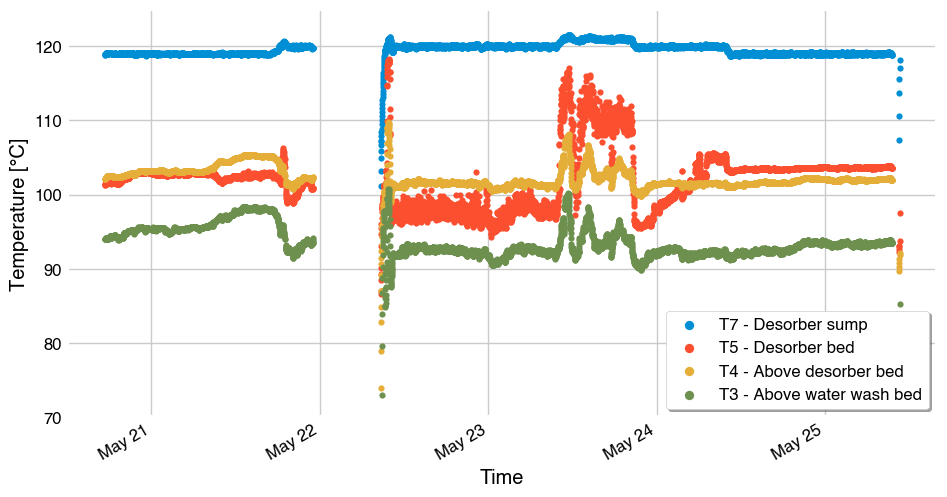

In [27]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=corr_reduced_df, x='Time', y='T7',label='T7 - Desorber sump', s=20, linewidth=0)
#sns.scatterplot(data=df_reduced, x='Time', y='T2',label='T2 - Desorber inlet', s=20, linewidth=0)

sns.scatterplot(data=corr_reduced_df, x='Time', y='T5',label='T5 - Desorber bed', s=20, linewidth=0)
sns.scatterplot(data=corr_reduced_df, x='Time', y='T4',label='T4 - Above desorber bed', s=20, linewidth=0)
sns.scatterplot(data=corr_reduced_df, x='Time', y='T3',label='T3 - Above water wash bed', s=20, linewidth=0)

plt.xlabel('Time')
plt.ylabel('Temperature [°C]')
plt.xlim(pd.to_datetime('2020-05-20 12:00'), pd.to_datetime('2020-05-25 16:00'))
plt.ylim(70, 125)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %d'))
plt.gcf().autofmt_xdate() 
plt.legend(markerscale=1.5, loc='lower right', shadow=True, fancybox=True)
utils.save_file(plt.gcf(), PLOTS_PATH, "T5-Issue.pdf", 'matplotlib', overwrite=OVERWRITE)
plt.show()

temp_reduced_df = corr_reduced_df.drop(["T5"], axis=1)

## Anomalies in B11 measurements and making CAP

File B11-Issue.pdf already exists at /Users/junxingli/Desktop/master_thesis/figs/preprocessing/B11-Issue.pdf. Set 'overwrite=True' to overwrite the file.


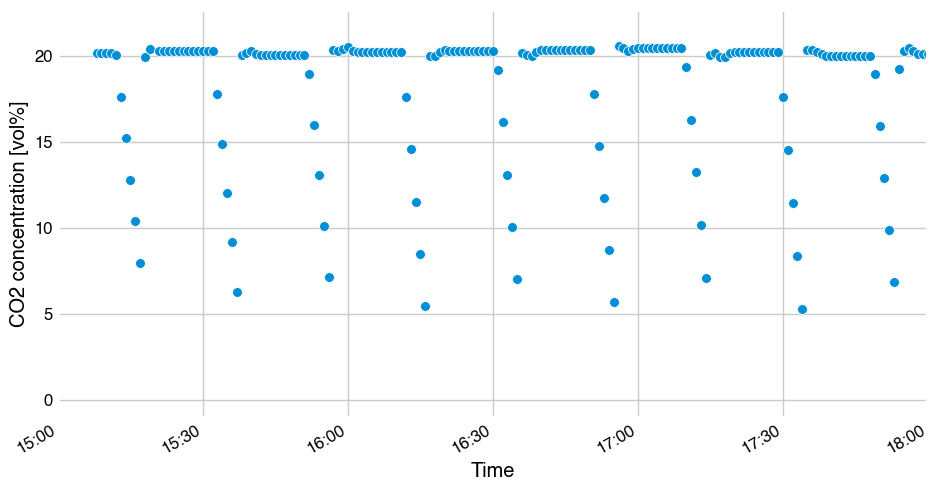

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=temp_reduced_df, x='Time', y='B11', s=50)

plt.xlabel('Time')
plt.ylabel('CO2 concentration [vol%]')
plt.xlim(pd.to_datetime('2020-06-03 15:00'), pd.to_datetime('2020-06-03 18:00'))

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gcf().autofmt_xdate() 
utils.save_file(plt.gcf(), PLOTS_PATH, "B11-Issue.pdf", 'matplotlib', overwrite=OVERWRITE)
plt.show()

File B11-Correction.pdf already exists at /Users/junxingli/Desktop/master_thesis/figs/preprocessing/B11-Correction.pdf. Set 'overwrite=True' to overwrite the file.


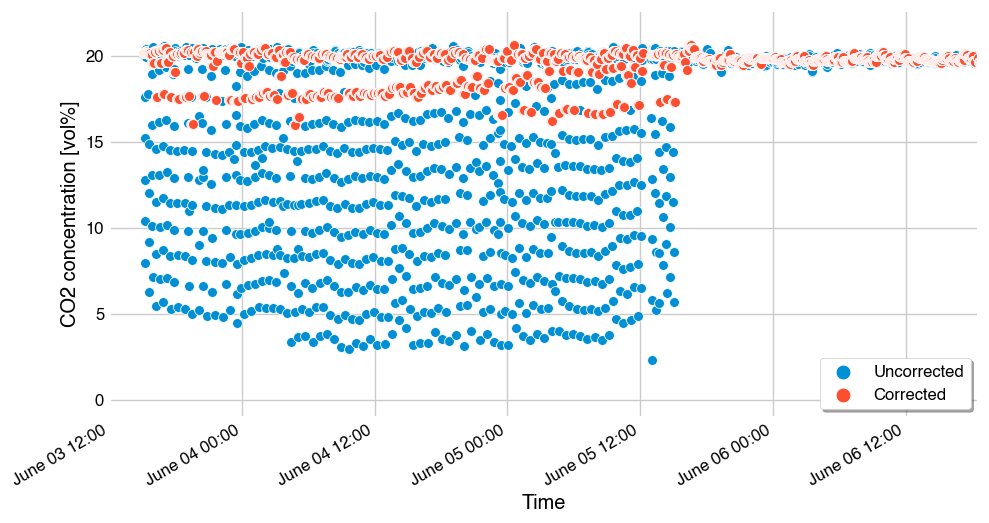

In [29]:
def correct_CO2_conc(df, col='B11'):
    # New column for duplicates classification
    df['Change'] = df[col].diff(1).ne(0)
    for i, val in enumerate(df['Change']):
        if (val == True) and df['Change'].iloc[i+1] == False:
            df['Change'].iloc[i] = False
    
    # Sets duplicates as 'True'
    df['Change'] = ~df['Change']
    
    # Calculates median for a window containg 'False'
    for i, val in enumerate(df['Change']):
        # When switch from True to False occurs
        if (val == False) and df['Change'].iloc[i-1] == True:
            counter = 0
            anomaly = []
            while df['Change'].iloc[i+counter] == False:
                anomaly.append(df[col].iloc[i+counter])
                counter += 1
            median = np.median(anomaly)
            df[col].iloc[i:i+counter] = median
    return df.drop('Change', axis=1)

def plot_CAP(df_uncorrected, df_corrected, plots_path, overwrite=False):
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_uncorrected, x='Time', y='B11', label='Uncorrected', s=50)
    sns.scatterplot(data=df_corrected, x='Time', y='B11', label='Corrected', s=50)

    # Set titles and labels
    plt.xlabel('Time')
    plt.ylabel('CO2 concentration [vol%]')
    plt.xlim(pd.to_datetime('2020-06-03 12:00'), pd.to_datetime('2020-06-06 18:39'))

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%B %d %H:00'))
    plt.gcf().autofmt_xdate() 
    plt.legend(markerscale=1.5, loc='lower right', shadow=True, fancybox=True)
    utils.save_file(plt.gcf(), plots_path, "B11-Correction.pdf", 'matplotlib', overwrite)
    plt.show()
    
def calc_CAP(df):
    num = (100 - df['A11'] - df['B11']) * df['B12']
    denum = (100 - df['A12'] - df['B12']) * df['B11']
    return 100 * (1 - num / denum)
    
# Correct B11 in a limited time frame
mask = (temp_reduced_df['Time'] >= '2020-06-01 16:33') & (temp_reduced_df['Time'] <= '2020-06-06 18:39')
new_B11 = correct_CO2_conc(temp_reduced_df.loc[mask], 'B11')

# Apply corrected B11 and add CAP
corrected_df = temp_reduced_df.copy()
corrected_df.loc[mask, 'B11'] = new_B11['B11']
corrected_df.loc[mask, 'Cap'] = calc_CAP(new_B11)

plot_CAP(temp_reduced_df, corrected_df, PLOTS_PATH, overwrite=OVERWRITE)

## Transient/stationary labels

In [30]:
# Set of global variables, overwrites those from preprocessing.py
stable = {'F1': 0.1, 'D1': 10, 'T2': 1, 'P6': 0.03, 'T7': 0.5, 'L7': 50, 
          'F8': 0.1, 'D8': 10, 'T9': 0.5, 'F10': 5, 'T10': 1, 'B11': 0.3, 
          'B12': 0.3, 'Cap': 1.5}

stability_df, counter = preprocessing.add_stability(corrected_df, 
                                                30,
                                                method='hybrid', 
                                                stable=stable)

total_counter = stability_df["Status"].__len__()
stable_counter = stability_df[stability_df['Status'] == 'Stable']['Status'].__len__()

print(f"Stable: {stable_counter} out of {total_counter} ({stable_counter/total_counter*100:.2f}%)")
counter

Stable: 11944 out of 21618 (55.25%)


{'B11': 3575,
 'Cap': 3852,
 'B12': 3431,
 'F1': 1832,
 'T9': 2902,
 'F8': 640,
 'F10': 804,
 'T2': 363,
 'P6': 412,
 'T7': 516,
 'T10': 2996,
 'D1': 41,
 'D8': 24,
 'Counter': [0,
  2,
  37,
  51,
  112,
  104,
  147,
  176,
  263,
  656,
  1175,
  2107,
  4844,
  11944]}

In [31]:
var = "T10"
stable = stability_df[stability_df["Status"] == "Stable"]
unstable = stability_df[stability_df["Status"] == "Unstable"]

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=stable['Time'], 
        y=stable[var], 
        mode='markers', 
        marker=dict(size=2),
        name='Stable',
    )
)

fig.add_trace(
    go.Scatter(
        x=unstable['Time'], 
        y=unstable[var], 
        mode='markers', 
        marker=dict(size=2),
        name='Unstable',
    )
)

fig.show()

## Transformation to SRD

In [33]:
df = stability_df.copy()
df["SRD"] = 3.6 * df["U7"] / df["F10"]
df = df.drop(["U7", "F10"], axis=1)

utils.save_file(df, DATA_PATH, "SRD_Lysekil.pkl", "pandas", overwrite=OVERWRITE)

File SRD_Lysekil.pkl already exists at /Users/junxingli/Desktop/master_thesis/data/processed/SRD_Lysekil.pkl. Set 'overwrite=True' to overwrite the file.


In [51]:
pearson = df.drop(['Time', 'Status'], axis=1).corr(method="pearson")
visualize.make_heatmap(pearson)